In [93]:
References: https://github.com/marlesson/recsys_autoencoders/tree/master

import numpy as np
import pandas as pd
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
user_df = pd.read_csv('user_ratings.csv')
games_df = pd.read_csv('games.csv')

In [3]:
rating_limit = user_df[user_df['Username'].map(user_df['Username'].value_counts()) >= 100]
rating_limit.Rating = round(rating_limit.Rating, 0)
rating_limit = rating_limit[rating_limit['BGGId'].map(rating_limit['BGGId'].value_counts()) >= 200]
rating_limit = rating_limit[rating_limit['Rating'].map(rating_limit['Rating'].value_counts()) >= 8]

C:\Users\JER\AppData\Local\Temp\ipykernel_19280\1478136687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_limit.Rating = round(rating_limit.Rating, 0)


In [4]:
rating_limit['Username'] = rating_limit['Username'].astype('category')
rating_limit['Username'] = rating_limit['Username'].cat.codes

In [5]:
rating_pvt = pd.pivot_table(rating_limit, values='Rating', index='BGGId', columns='Username')
rating_pvt.head()

Username,0,1,2,3,4,5,6,7,8,9,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
BGGId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,8.0,9.0,NaN,6.0,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
5,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,6.0,5.0,7.0,NaN,8.0,NaN,NaN


In [6]:
# calculate the mean
user_pvt = rating_pvt.copy()
user_pvt['mean'] = user_pvt.mean(axis=1)

# subtract mean
user_pvt = user_pvt.subtract(user_pvt['mean'], axis=0)

# fill missing values
user_pvt = user_pvt.fillna(0)
user_pvt.drop(['mean'], axis=1, inplace=True)

user_pvt

Username,0,1,2,3,4,5,6,7,8,9,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
BGGId,,,,,,,,,,,,,,,,,,,,,
1,0.0,-2.601482,0.000000,0.000000,0.0,1.398518,0.0,0.0,0.0,1.398518,...,0.000000,0.0,0.0,0.000000,-0.601482,0.000000,0.0,-2.601482,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,-3.406427,0.593573,1.593573,0.0,-1.406427,0.0,0.0,0.0,0.000000,...,0.593573,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,-0.542587,0.000000,0.0,0.000000,0.0,0.0
5,0.0,-0.312653,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,-0.312653,0.0,0.0,-1.312653,-2.312653,-0.312653,0.0,0.687347,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342942,0.0,0.000000,0.387441,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,-0.612559,0.0,0.000000,0.0,0.0
343562,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
343905,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [7]:
game_id_pvt = user_pvt.reset_index()
game_id_pvt.head()

Username,BGGId,0,1,2,3,4,5,6,7,8,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
0,1,0.0,-2.601482,0.000000,0.000000,0.0,1.398518,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,-0.601482,0.000000,0.0,-2.601482,0.0,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,3,0.0,-3.406427,0.593573,1.593573,0.0,-1.406427,0.0,0.0,0.0,...,0.593573,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,-0.542587,0.000000,0.0,0.000000,0.0,0.0
4,5,0.0,-0.312653,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,-0.312653,0.0,0.0,-1.312653,-2.312653,-0.312653,0.0,0.687347,0.0,0.0


In [104]:
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='selu', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [105]:
# input
X = user_pvt.values
y = user_pvt.values

In [106]:
model = autoEncoder(X)

model.compile(optimizer = Adam(learning_rate=0.0001), loss='mse',metrics =["accuracy"])
    
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 UserScore (InputLayer)      [(None, 48394)]           0         
                                                                 
 EncLayer1 (Dense)           (None, 512)               24778240  
                                                                 
 LatentSpace (Dense)         (None, 256)               131328    
                                                                 
 Dropout (Dropout)           (None, 256)               0         
                                                                 
 DecLayer1 (Dense)           (None, 512)               131584    
                                                                 
 UserScorePred (Dense)       (None, 48394)             24826122  
                                                                 
Total params: 49867274 (190.23 MB)
Trainable params: 498672

In [107]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.2)

Epoch 1/50
86/86 [==============================] - 27s 314ms/step - loss: 0.0812 - accuracy: 0.0000e+00 - val_loss: 0.0323 - val_accuracy: 0.0051
Epoch 2/50
86/86 [==============================] - 25s 296ms/step - loss: 0.0685 - accuracy: 0.0046 - val_loss: 0.0311 - val_accuracy: 0.0080
Epoch 3/50
86/86 [==============================] - 26s 302ms/step - loss: 0.0641 - accuracy: 0.0071 - val_loss: 0.0306 - val_accuracy: 0.0146
Epoch 4/50
86/86 [==============================] - 26s 301ms/step - loss: 0.0621 - accuracy: 0.0084 - val_loss: 0.0302 - val_accuracy: 0.0160
Epoch 5/50
86/86 [==============================] - 26s 301ms/step - loss: 0.0610 - accuracy: 0.0095 - val_loss: 0.0300 - val_accuracy: 0.0160
Epoch 6/50
86/86 [==============================] - 26s 301ms/step - loss: 0.0603 - accuracy: 0.0102 - val_loss: 0.0299 - val_accuracy: 0.0175
Epoch 7/50
86/86 [==============================] - 26s 299ms/step - loss: 0.0599 - accuracy: 0.0126 - val_loss: 0.0299 - val_accuracy: 0.

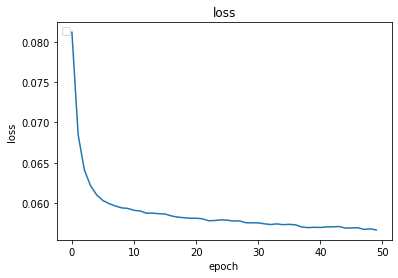

In [108]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])

plot_hist(hist)

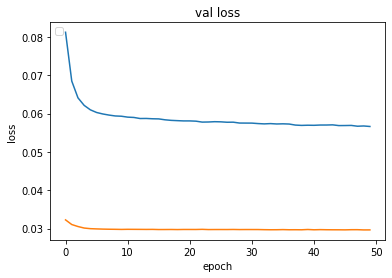

In [109]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('val loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])

plot_hist(hist)

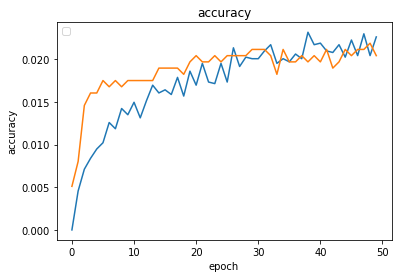

In [111]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])

plot_hist(hist)

In [112]:
# Predict new Matrix Interactions, set score zero on visualized games
new_matrix = model.predict(X) * (X[0] == 0)

215/215 [==============================] - 3s 14ms/step


In [113]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = user_pvt.columns, 
                                          index   = user_pvt.index)
new_users_items_matrix_df.head()

Username,0,1,2,3,4,5,6,7,8,9,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
BGGId,,,,,,,,,,,,,,,,,,,,,
1,-0.049090,-0.0,0.270035,0.103005,-0.146088,0.0,-0.088056,0.019423,0.051940,0.0,...,0.024466,0.011007,0.092356,-0.022958,-0.0,-0.056774,-0.078793,-0.0,-0.022874,0.026041
2,0.008363,-0.0,-0.007056,0.011693,-0.011743,-0.0,0.007380,0.007250,0.010104,0.0,...,0.009321,0.006862,0.005435,-0.008765,0.0,-0.015597,-0.023611,-0.0,-0.015024,0.012884
3,-0.174889,-0.0,0.460160,0.027211,-0.002921,-0.0,0.053181,0.014292,-0.052815,0.0,...,0.022988,0.119164,0.181701,0.030320,-0.0,-0.036917,-0.276277,-0.0,0.026309,-0.013212
4,0.007384,-0.0,0.016602,0.017512,-0.005909,0.0,0.001464,0.007772,0.014435,0.0,...,0.004878,0.016076,0.010181,0.000526,-0.0,-0.001116,-0.018470,-0.0,-0.003301,0.007055
5,-0.100866,-0.0,0.145786,0.016525,-0.128078,-0.0,0.020256,-0.000320,-0.073332,0.0,...,0.013493,0.062895,0.098444,-0.025247,-0.0,-0.004962,-0.126203,-0.0,-0.059358,0.023930


In [114]:
print(new_users_items_matrix_df.values.min(), new_users_items_matrix_df.values.max())

-1.7434893 3.9004536


In [160]:
def recommender_for_user(Username, interact_matrix, df_content, topn = 10):
    '''
    Recommender Games for UserWarning
    '''
    pred_scores = interact_matrix.loc[Username].values
    
    df_scores =   pd.DataFrame({'BGGId': list(user_pvt.columns), 
                               'score': pred_scores})
    
    df_rec      = df_scores.merge(df_content, left_on='BGGId', right_on='BGGId')
    df_rec      = df_rec.sort_values(by=['score'], ascending =False)
    df_rec      = df_rec[['BGGId','score','Name']]
    
    return df_rec[df_rec.score > 0]

In [162]:
# Games previously purchased by the user
recommender_for_user(481, user_pvt, games_df)

,BGGId,score,Name
5174,11071,3.245623,Austin Poker
7428,25768,3.245623,Long Live the King
8394,35369,3.245623,Martian Fluxx
5829,14128,3.245623,Jupiter
2477,3674,3.245623,Fast Attack Boats: A Game of the Arab-Israeli ...
...,...,...,...
4412,8365,0.245623,Napoleon at Lutzen
2448,3629,0.245623,Start Your Own Riot!
184,214,0.245623,Café International
48,51,0.245623,Ricochet Robots


In [163]:
# Recommended User Games
recommender_for_user(481, new_users_items_matrix_df, games_df)

,BGGId,score,Name
9090,41955,0.990793,Eurooppa Tietopeli
7532,26729,0.679688,Blanko
7925,30645,0.566148,Tammany Hall
1384,1899,0.537585,13 Dead End Drive
90,99,0.514041,Fortress America
...,...,...,...
3969,7104,0.000055,Ace of Aces: Powerhouse Series
7607,27460,0.000018,Power Yahtzee
9171,42898,0.000014,Pocket Battles: Celts vs. Romans
623,760,0.000012,Battle Line
